In [1]:
import pandas as pd

In [2]:
#pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_excel('mic2 (1).xlsx',
                 engine='openpyxl')
#df

In [4]:
def custom_cls(x):
    if(0<=x<=20):
        return '<=20'
    elif (21<=x<=30):
        return '21-30'
    elif (31<=x<=40):
        return '31-40'
    else:
        return '> 40'
    

In [5]:
df['AgeGP']=df.apply(lambda tbl: custom_cls(tbl['Age']),axis=1)
df.head(2)

,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend,AgeGP
0,31,Male,Research,">40, 000",5,5,5,4,4,5,...,4,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree,31-40
1,25,Male,student,"<10,000",3,5,3,4,5,5,...,4,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral,21-30


In [6]:
age_gender=df.groupby(['AgeGP','Sex']).size()
age_gender=age_gender.to_frame()
age_gender

0
AgeGP Sex       
21-30 Female  11
      Male    20
31-40 Female   4
      Male     1
<=20  Female   5
      Male     6
> 40  Female   2
      Male     1

In [7]:
age_sex=pd.pivot_table(index=['AgeGP','Sex'],
                       aggfunc=len,
                       values='Availability',
                       data=df,
                       margins=True
                      )
age_sex

Availability
AgeGP Sex                 
21-30 Female            11
      Male              20
31-40 Female             4
      Male               1
<=20  Female             5
      Male               6
> 40  Female             2
      Male               1
All                     50

In [8]:
age_gender=age_gender.rename(columns={0:'Count'})
age_gender

Count
AgeGP Sex          
21-30 Female     11
      Male       20
31-40 Female      4
      Male        1
<=20  Female      5
      Male        6
> 40  Female      2
      Male        1

In [9]:
x=age_gender.iloc[:,-1].sum()
x
age_gender['%']=(age_gender.iloc[:,-1]/x)*100
age_gender

Count     %
AgeGP Sex                
21-30 Female     11  22.0
      Male       20  40.0
31-40 Female      4   8.0
      Male        1   2.0
<=20  Female      5  10.0
      Male        6  12.0
> 40  Female      2   4.0
      Male        1   2.0

In [10]:
plot_order=['<=20','21-30','31-40','> 40']

In [11]:
#pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [12]:
import seaborn as sns

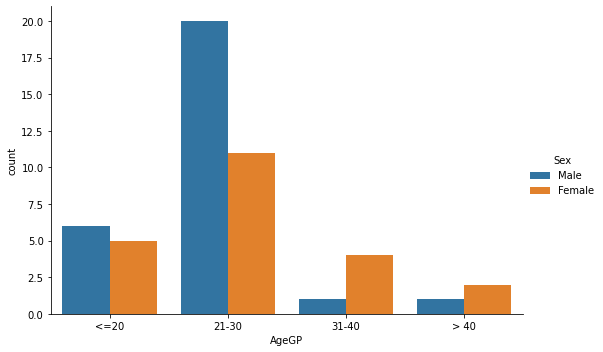

In [13]:
g=sns.catplot(x='AgeGP',
              kind='count',
              data=df,
              hue='Sex',
             order=plot_order,
              height=5,
              aspect=1.5
             )


In [14]:
#pip install plotly

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

In [20]:
fig=px.sunburst(age_gender,
                values='Count',
                path=['AgeGP','Sex','Count','%'],
                color='AgeGP',
                title='Number of respondents by AgeGroup and Gender'
               )
fig.show()

ValueError: Value of 'path_0' is not the name of a column in 'data_frame'. Expected one of ['Count', '%'] but received: AgeGP

In [21]:
#pip install dash

In [22]:
import dash 

In [23]:
from dash import html

In [24]:
from dash import dcc

In [25]:
#pip install jupyter_dash

In [26]:
from jupyter_dash import JupyterDash

In [27]:
p2=JupyterDash(__name__)
p2.layout=html.Div(children=[html.H1('Title', 
                                    ),
                             dcc.Graph(figure=fig)
                            ]
                  )
if __name__=='__main__':
    p2.run_server()

NameError: name 'fig' is not defined